# Pandas TA ([pandas_ta](https://github.com/twopirllc/pandas-ta)) Studies for Custom Technical Analysis

## Topics
- What is a Pandas TA Study?
    - Builtin Studies: __AllStudy__ and __CommonStudy__
    - Creating Studies
- Watchlist Class
    - Study Management and Execution
    - **NOTE:** The **watchlist** module is independent of Pandas TA. To easily use it, copy it from your local pandas_ta installation directory into your project directory.
- Indicator Composition/Chaining for more Complex Studies
    - Comprehensive Example: _MACD and RSI Momo with BBANDS and SMAs 50 & 200 and Cumulative Log Returns_

In [1]:
%matplotlib inline
import datetime as dt

from tqdm import tqdm

import pandas as pd
import pandas_ta as ta
from alphaVantageAPI.alphavantage import AlphaVantage  # pip install alphaVantage-api

from watchlist import Watchlist # Is this failing? If so, copy it locally. See above.

print(f"\nPandas TA v{ta.version}\nTo install the Latest Version:\n$ pip install -U git+https://github.com/twopirllc/pandas-ta\n")
%pylab inline


Pandas TA v0.3.63b0
To install the Latest Version:
$ pip install -U git+https://github.com/twopirllc/pandas-ta

Populating the interactive namespace from numpy and matplotlib


# What is a Pandas TA Study?
A _Study_ is a simple way to name and group TA indicators. Technically, a _Study_ is a simple Data Class to contain list of indicators and their parameters. __Note__: _Study_ is experimental and subject to change. Pandas TA comes with two basic Studies: __AllStudy__ and __CommonStudy__.

## Study Requirements:
- _name_: Some short memorable string.  _Note_: Case-insensitive "All" is reserved.
- _ta_: A list of dicts containing keyword arguments to identify the indicator and the indicator's arguments

## Optional Requirements:
- _description_: A more detailed description of what the Study tries to capture. Default: None
- _created_: At datetime string of when it was created. Default: Automatically generated.

### Things to note:
- A Study will __fail__ when consumed by Pandas TA if there is no {"kind": "indicator name"} attribute.

# Builtin Examples

### All
Default Values

In [2]:
AllStudy = ta.AllStudy
print(f"{AllStudy.name = }")
print(f"{AllStudy.description = }")
print(f"{AllStudy.created = }")
print(f"{AllStudy.ta = }")
print(f"{AllStudy.cores = }")

AllStudy.name = 'All'
AllStudy.description = 'All the indicators with their default settings. Pandas TA default.'
AllStudy.created = 'Sunday May 1, 2022, NYSE: 14:13:39, Local: 18:13:39 PDT, Day 121/365 (33.00%)'
AllStudy.ta = None
AllStudy.cores = 8


### Common
Default Values

In [3]:
CommonStudy = ta.CommonStudy
print(f"{CommonStudy.name = }")
print(f"{CommonStudy.description = }")
print(f"{CommonStudy.created = }")
print(f"{CommonStudy.ta = }")
print(f"{CommonStudy.cores = }")

CommonStudy.name = 'Common Price and Volume SMAs'
CommonStudy.description = 'Common Price SMAs: 10, 20, 50, 200 and Volume SMA: 20.'
CommonStudy.created = 'Sunday May 1, 2022, NYSE: 14:13:39, Local: 18:13:39 PDT, Day 121/365 (33.00%)'
CommonStudy.ta = [{'kind': 'sma', 'length': 10}, {'kind': 'sma', 'length': 20}, {'kind': 'sma', 'length': 50}, {'kind': 'sma', 'length': 200}, {'kind': 'sma', 'close': 'volume', 'length': 20, 'prefix': 'VOL'}]
CommonStudy.cores = 0


# Creating Studies
Studies require a **name** and an array of dicts containing the "kind" of indicator ("sma") and other potential parameters for **ta**.

### Simple Study A

In [4]:
custom_a = ta.Study(name="A", cores=0, ta=[{"kind": "sma", "length": 50}, {"kind": "sma", "length": 200}])
custom_a

Study(name='A', ta=[{'kind': 'sma', 'length': 50}, {'kind': 'sma', 'length': 200}], cores=0, description='', created='Sunday May 1, 2022, NYSE: 14:13:39, Local: 18:13:39 PDT, Day 121/365 (33.00%)')

### Simple Study B

In [5]:
custom_b = ta.Study(name="B", cores=0, ta=[{"kind": "ema", "length": 8}, {"kind": "ema", "length": 21}, {"kind": "log_return", "cumulative": True}, {"kind": "rsi"}, {"kind": "supertrend"}])
custom_b

Study(name='B', ta=[{'kind': 'ema', 'length': 8}, {'kind': 'ema', 'length': 21}, {'kind': 'log_return', 'cumulative': True}, {'kind': 'rsi'}, {'kind': 'supertrend'}], cores=0, description='', created='Sunday May 1, 2022, NYSE: 14:13:39, Local: 18:13:39 PDT, Day 121/365 (33.00%)')

### Bad Study. (Misspelled Indicator)

In [6]:
# Misspelled indicator, will fail later when ran with Pandas TA
custom_run_failure = ta.Study(name="Runtime Failure", cores=0, ta=[{"kind": "peret_return"}])
custom_run_failure

Study(name='Runtime Failure', ta=[{'kind': 'peret_return'}], cores=0, description='', created='Sunday May 1, 2022, NYSE: 14:13:39, Local: 18:13:39 PDT, Day 121/365 (33.00%)')

# Study Management and Execution with _Watchlist_

### Initialize AlphaVantage Data Source

In [7]:
AV = AlphaVantage(
    api_key="YOUR API KEY", premium=False,
    output_size='full', clean=True,
    export_path=".", export=True
)
AV

AlphaVantage(
  end_point:str = https://www.alphavantage.co/query,
  api_key:str = YOUR API KEY,
  export:bool = True,
  export_path:str = .,
  output_size:str = full,
  output:str = csv,
  datatype:str = json,
  clean:bool = True,
  proxy:dict = {}
)

### Create Watchlist and set it's 'ds' to AlphaVantage

In [8]:
data_source = "av" # Default
data_source = "yahoo"
watch = Watchlist(["SPY", "IWM"], ds_name=data_source, timed=True)



#### Info about the Watchlist. Note, the default Study is "All"

In [9]:
watch

Watch(name='Watch: SPY, IWM', ds_name='yahoo', tickers[2]='SPY, IWM', tf='D', study[5]='Common Price and Volume SMAs')

### Help about Watchlist

In [10]:
help(Watchlist)

Help on class Watchlist in module watchlist:

class Watchlist(builtins.object)
 |  Watchlist(tickers: list, tf: str = None, name: str = None, study: pandas_ta.utils._study.Study = None, ds_name: str = 'av', **kwargs)
 |  
 |  # Watchlist Class (** This is subject to change! **)
 |  A simple Class to load/download financial market data and automatically
 |  apply Technical Analysis indicators with a Pandas TA Study.
 |  
 |  Default Study: pandas_ta.CommonStudy
 |  
 |  ## Package Support:
 |  ### Data Source (Default: AlphaVantage)
 |  - AlphaVantage (pip install alphaVantage-api).
 |  - Python Binance (pip install python-binance). # Future Support
 |  - Yahoo Finance (pip install yfinance). # Almost Supported
 |  
 |  # Technical Analysis:
 |  - Pandas TA (pip install pandas_ta)
 |  
 |  ## Required Arguments:
 |  - tickers: A list of strings containing tickers. Example: ["SPY", "AAPL"]
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tickers: list, tf: str = None, name: str = N

### Default Study is "Common"

In [11]:
# No arguments loads all the tickers and applies the Study to each ticker.
# The result can be accessed with Watchlist's 'data' property which returns a 
# dictionary keyed by ticker and DataFrames as values 
watch.load(verbose=True)

[!] Loading All: SPY, IWM
[+] Downloading[yahoo]: SPY[D]
[+] yf | SPY(7367, 7): 3219.4573 ms (3.2195 s)
[+] Saving: /Users/kj/av_data/SPY_D.csv
[+] Study: Common Price and Volume SMAs
[i] Indicator arguments: {'timed': True, 'append': True}
[i] No multiprocessing (cores = 0).


[i] Progress: 100%|███████████████████████████| 5/5 [00:00<00:00, 116.92it/s]

[i] Total indicators: 5
[i] Columns added: 5
[i] Last Run: Sunday May 1, 2022, NYSE: 14:13:43, Local: 18:13:43 PDT, Day 121/365 (33.00%)
[i] Analysis Time: 57.7287 ms (0.0577 s) for 5 columns (avg 11.5490 ms / col)
[+] Downloading[yahoo]: IWM[D]


[+] yf | IWM(5517, 7): 3059.8179 ms (3.0598 s)
[+] Saving: /Users/kj/av_data/IWM_D.csv
[+] Study: Common Price and Volume SMAs
[i] Indicator arguments: {'timed': True, 'append': True}
[i] No multiprocessing (cores = 0).


[i] Progress: 100%|██████████████████████████| 5/5 [00:00<00:00, 1228.20it/s]

[i] Total indicators: 5
[i] Columns added: 5
[i] Last Run: Sunday May 1, 2022, NYSE: 14:13:46, Local: 18:13:46 PDT, Day 121/365 (33.00%)
[i] Analysis Time: 5.2669 ms (0.0053 s) for 5 columns (avg 1.0540 ms / col)


In [12]:
", ".join([f"{t}: {d.shape}" for t,d in watch.data.items()])

'SPY: (7367, 12), IWM: (5517, 12)'

In [13]:
watch.data["SPY"]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_10,SMA_20,SMA_50,SMA_200,VOL_SMA_20
Date,,,,,,,,,,,,
1993-01-29,25.566139,25.566139,25.438944,25.547968,1003200,0.0,0,NaN,NaN,NaN,NaN,NaN
1993-02-01,25.566160,25.729696,25.566160,25.729696,480500,0.0,0,NaN,NaN,NaN,NaN,NaN
1993-02-02,25.711524,25.802377,25.657012,25.784206,201300,0.0,0,NaN,NaN,NaN,NaN,NaN
1993-02-03,25.820536,26.074926,25.802366,26.056755,529400,0.0,0,NaN,NaN,NaN,NaN,NaN
1993-02-04,26.147607,26.220289,25.856876,26.165777,531500,0.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,423.670013,428.690002,418.839996,428.510010,119647700,0.0,0,437.964005,445.552502,438.527184,446.076082,86801825.0
2022-04-26,425.829987,426.040009,416.070007,416.100006,103996300,0.0,0,435.582004,443.562003,438.067266,445.992511,88575150.0
2022-04-27,417.239990,422.920013,415.010010,417.269989,122030000,0.0,0,433.480002,441.348003,437.659459,445.922166,90347575.0


[i] Loaded SPY[D]: SPY_D.csv
[i] Analysis Time: 3.1206 ms (0.0031 s) for 5 columns (avg 0.6251 ms / col)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_10,SMA_20,SMA_50,SMA_200,VOL_SMA_20
Date,,,,,,,,,,,,
1993-01-29,25.566139,25.566139,25.438944,25.547968,1003200,0.0,0,NaN,NaN,NaN,NaN,NaN
1993-02-01,25.566160,25.729696,25.566160,25.729696,480500,0.0,0,NaN,NaN,NaN,NaN,NaN
1993-02-02,25.711524,25.802377,25.657012,25.784206,201300,0.0,0,NaN,NaN,NaN,NaN,NaN
1993-02-03,25.820536,26.074926,25.802366,26.056755,529400,0.0,0,NaN,NaN,NaN,NaN,NaN
1993-02-04,26.147607,26.220289,25.856876,26.165777,531500,0.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,423.670013,428.690002,418.839996,428.510010,119647700,0.0,0,437.964005,445.552502,438.527184,446.076082,86801825.0
2022-04-26,425.829987,426.040009,416.070007,416.100006,103996300,0.0,0,435.582004,443.562003,438.067266,445.992511,88575150.0
2022-04-27,417.239990,422.920013,415.010010,417.269989,122030000,0.0,0,433.480002,441.348003,437.659459,445.922166,90347575.0


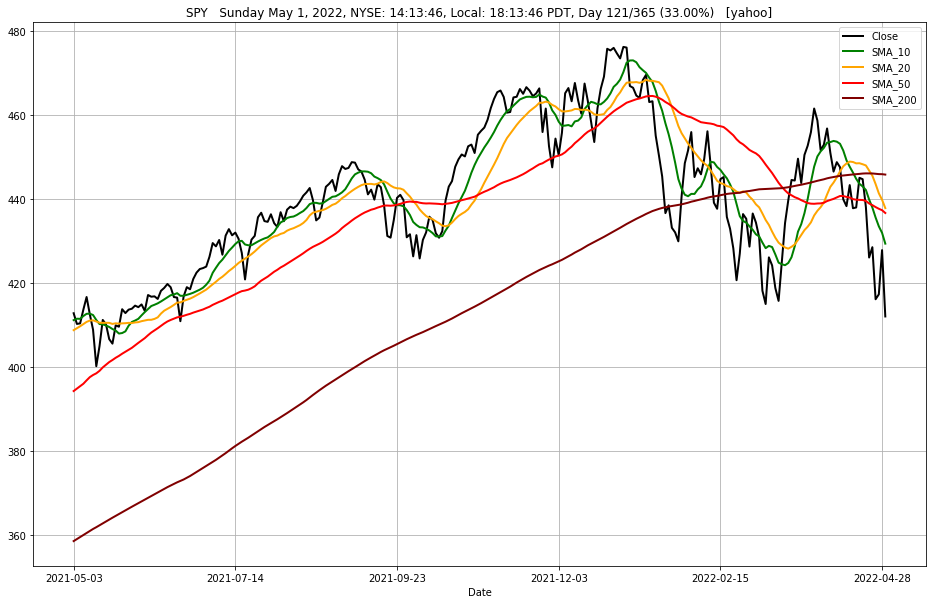

In [14]:
watch.load("SPY", plot=True, mas=True)

## Easy to swap Studies and run them

### Running Simple Study A

In [15]:
# Load custom_a into Watchlist and verify
watch.study = custom_a
watch.study

Study(name='A', ta=[{'kind': 'sma', 'length': 50}, {'kind': 'sma', 'length': 200}], cores=0, description='', created='Sunday May 1, 2022, NYSE: 14:13:39, Local: 18:13:39 PDT, Day 121/365 (33.00%)')

In [16]:
watch.load("IWM")

[i] Loaded IWM[D]: IWM_D.csv
[i] Analysis Time: 1.5740 ms (0.0016 s) for 2 columns (avg 0.7898 ms / col)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_50,SMA_200
Date,,,,,,,,,
2000-05-26,34.265217,34.406322,34.100593,34.406322,74800,0.0,0.0,NaN,NaN
2000-05-30,34.900198,35.676281,34.900198,35.676281,57600,0.0,0.0,NaN,NaN
2000-05-31,35.793875,36.264228,35.793875,35.805634,36000,0.0,0.0,NaN,NaN
2000-06-01,36.540538,36.616970,36.540538,36.616970,7000,0.0,0.0,NaN,NaN
2000-06-02,38.274976,38.521912,38.274976,38.521912,29400,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-04-25,190.990005,194.110001,189.210007,193.850006,35556500,0.0,0.0,200.899373,214.747744
2022-04-26,192.320007,192.710007,187.479996,187.740005,40513600,0.0,0.0,200.634474,214.562645
2022-04-27,187.669998,189.779999,186.259995,186.960007,37808000,0.0,0.0,200.367949,214.394826


### Running Simple Study B

In [17]:
# Load custom_b into Watchlist and verify
watch.study = custom_b
watch.study

Study(name='B', ta=[{'kind': 'ema', 'length': 8}, {'kind': 'ema', 'length': 21}, {'kind': 'log_return', 'cumulative': True}, {'kind': 'rsi'}, {'kind': 'supertrend'}], cores=0, description='', created='Sunday May 1, 2022, NYSE: 14:13:39, Local: 18:13:39 PDT, Day 121/365 (33.00%)')

In [18]:
watch.load("IWM")

[i] Loaded IWM[D]: IWM_D.csv
[i] Analysis Time: 249.7703 ms (0.2498 s) for 8 columns (avg 31.2219 ms / col)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,EMA_8,EMA_21,CUMLOGRET_1,RSI_14,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0
Date,,,,,,,,,,,,,,,
2000-05-26,34.265217,34.406322,34.100593,34.406322,74800,0.0,0.0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2000-05-30,34.900198,35.676281,34.900198,35.676281,57600,0.0,0.0,NaN,NaN,0.036246,NaN,NaN,NaN,NaN,NaN
2000-05-31,35.793875,36.264228,35.793875,35.805634,36000,0.0,0.0,NaN,NaN,0.039865,NaN,NaN,NaN,NaN,NaN
2000-06-01,36.540538,36.616970,36.540538,36.616970,7000,0.0,0.0,NaN,NaN,0.062271,NaN,NaN,NaN,NaN,NaN
2000-06-02,38.274976,38.521912,38.274976,38.521912,29400,0.0,0.0,NaN,NaN,0.112987,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,190.990005,194.110001,189.210007,193.850006,35556500,0.0,0.0,197.294738,199.708898,1.728844,40.519591,205.318726,-1.0,NaN,205.318726
2022-04-26,192.320007,192.710007,187.479996,187.740005,40513600,0.0,0.0,195.171464,198.620817,1.696818,34.286504,204.532482,-1.0,NaN,204.532482
2022-04-27,187.669998,189.779999,186.259995,186.960007,37808000,0.0,0.0,193.346696,197.560743,1.692654,33.576419,201.903553,-1.0,NaN,201.903553


### Running Bad Study. (Misspelled indicator)

In [19]:
# Load custom_run_failure into Watchlist and verify
watch.study = custom_run_failure
watch.study

Study(name='Runtime Failure', ta=[{'kind': 'peret_return'}], cores=0, description='', created='Sunday May 1, 2022, NYSE: 14:13:39, Local: 18:13:39 PDT, Day 121/365 (33.00%)')

In [20]:
try:
    iwm = watch.load("IWM")
except AttributeError as error:
    print(f"[X] Oops! {error}")

[i] Loaded IWM[D]: IWM_D.csv
[X] Oops! 'AnalysisIndicators' object has no attribute 'peret_return'


# Indicator Composition/Chaining
- When you need an indicator to depend on the value of a prior indicator
- Utilitze _prefix_ or _suffix_ to help identify unique columns or avoid column name clashes.
- Set ```cores=0``` for better performance when few indicators

### Volume MAs and MA chains

In [21]:
# Set EMA's and SMA's 'close' to 'volume' to create Volume MAs, prefix 'volume' MAs with 'VOLUME' so easy to identify the column
# Take a price EMA and apply LINREG from EMA's output
volmas_price_ma_chain = [
    {"kind":"ema", "close": "volume", "length": 10, "prefix": "VOLUME"},
    {"kind":"sma", "close": "volume", "length": 20, "prefix": "VOLUME"},
    {"kind":"ema", "length": 5},
    {"kind":"linreg", "close": "EMA_5", "length": 8, "prefix": "EMA_5"},
]
vp_ma_chain_ta = ta.Study("Volume MAs and Price MA chain", cores=0, ta=volmas_price_ma_chain)
vp_ma_chain_ta

Study(name='Volume MAs and Price MA chain', ta=[{'kind': 'ema', 'close': 'volume', 'length': 10, 'prefix': 'VOLUME'}, {'kind': 'sma', 'close': 'volume', 'length': 20, 'prefix': 'VOLUME'}, {'kind': 'ema', 'length': 5}, {'kind': 'linreg', 'close': 'EMA_5', 'length': 8, 'prefix': 'EMA_5'}], cores=0, description='', created='Sunday May 1, 2022, NYSE: 14:13:39, Local: 18:13:39 PDT, Day 121/365 (33.00%)')

In [22]:
# Update the Watchlist
watch.study = vp_ma_chain_ta
watch.study.name

'Volume MAs and Price MA chain'

In [23]:
spy = watch.load("SPY")
spy

[i] Loaded SPY[D]: SPY_D.csv
[i] Analysis Time: 2.6022 ms (0.0026 s) for 4 columns (avg 0.6515 ms / col)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,VOLUME_EMA_10,VOLUME_SMA_20,EMA_5,EMA_5_LR_8
Date,,,,,,,,,,,
1993-01-29,25.566139,25.566139,25.438944,25.547968,1003200,0.0,0,NaN,NaN,NaN,NaN
1993-02-01,25.566160,25.729696,25.566160,25.729696,480500,0.0,0,NaN,NaN,NaN,NaN
1993-02-02,25.711524,25.802377,25.657012,25.784206,201300,0.0,0,NaN,NaN,NaN,NaN
1993-02-03,25.820536,26.074926,25.802366,26.056755,529400,0.0,0,NaN,NaN,NaN,NaN
1993-02-04,26.147607,26.220289,25.856876,26.165777,531500,0.0,0,NaN,NaN,25.856881,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,423.670013,428.690002,418.839996,428.510010,119647700,0.0,0,9.487633e+07,86801825.0,433.629297,436.310946
2022-04-26,425.829987,426.040009,416.070007,416.100006,103996300,0.0,0,9.653451e+07,88575150.0,427.786200,431.983410
2022-04-27,417.239990,422.920013,415.010010,417.269989,122030000,0.0,0,1.011700e+08,90347575.0,424.280797,427.028940


### MACD BBANDS

In [24]:
# MACD is the initial indicator that BBANDS depends on.
# Set BBANDS's 'close' to MACD's main signal, in this case 'MACD_12_26_9' and add a prefix (or suffix) so it's easier to identify
macd_bands_ta = [
    {"kind":"macd"},
    {"kind":"bbands", "close": "MACD_12_26_9", "length": 20, "ddof": 0, "prefix": "MACD"}
]
macd_bands_ta = ta.Study("MACD BBands", cores=0, ta=macd_bands_ta, description=f"BBANDS_{macd_bands_ta[1]['length']} applied to MACD")
macd_bands_ta

Study(name='MACD BBands', ta=[{'kind': 'macd'}, {'kind': 'bbands', 'close': 'MACD_12_26_9', 'length': 20, 'ddof': 0, 'prefix': 'MACD'}], cores=0, description='BBANDS_20 applied to MACD', created='Sunday May 1, 2022, NYSE: 14:13:39, Local: 18:13:39 PDT, Day 121/365 (33.00%)')

In [25]:
# Update the Watchlist
watch.study = macd_bands_ta
watch.study.name

'MACD BBands'

In [26]:
spy = watch.load("SPY")
spy

[i] Loaded SPY[D]: SPY_D.csv
[i] Analysis Time: 4.9183 ms (0.0049 s) for 8 columns (avg 0.6155 ms / col)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_BBL_20_2.0,MACD_BBM_20_2.0,MACD_BBU_20_2.0,MACD_BBB_20_2.0,MACD_BBP_20_2.0
Date,,,,,,,,,,,,,,,
1993-01-29,25.566139,25.566139,25.438944,25.547968,1003200,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,25.566160,25.729696,25.566160,25.729696,480500,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-02,25.711524,25.802377,25.657012,25.784206,201300,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-03,25.820536,26.074926,25.802366,26.056755,529400,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-04,26.147607,26.220289,25.856876,26.165777,531500,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,423.670013,428.690002,418.839996,428.510010,119647700,0.0,0,-2.476816,-2.374482,-0.102334,-2.673813,2.605647,7.885107,405.232183,0.018657
2022-04-26,425.829987,426.040009,416.070007,416.100006,103996300,0.0,0,-4.090753,-3.190736,-0.900018,-3.782095,2.201584,8.185264,543.579435,-0.025792
2022-04-27,417.239990,422.920013,415.010010,417.269989,122030000,0.0,0,-5.215284,-3.452213,-1.763071,-4.949416,1.683306,8.316029,788.058859,-0.020042


# Comprehensive Study

### MACD and RSI Momentum with BBANDS and SMAs and Cumulative Log Returns

In [27]:
momo_bands_sma_ta = [
    {"kind":"sma", "length": 50},
    {"kind":"sma", "length": 200},
    {"kind":"bbands", "length": 20, "ddof": 0},
    {"kind":"macd"},
    {"kind":"rsi"},
    {"kind":"log_return", "cumulative": True},
    {"kind":"sma", "close": "CUMLOGRET_1", "length": 5, "suffix": "CUMLOGRET"},
]
momo_bands_sma_Study = ta.Study(
    name="Momo, Bands and SMAs and Cumulative Log Returns", # name
    ta=momo_bands_sma_ta, # ta
    description="MACD and RSI Momo with BBANDS and SMAs 50 & 200 and Cumulative Log Returns", # description
    cores=0
)
momo_bands_sma_Study

Study(name='Momo, Bands and SMAs and Cumulative Log Returns', ta=[{'kind': 'sma', 'length': 50}, {'kind': 'sma', 'length': 200}, {'kind': 'bbands', 'length': 20, 'ddof': 0}, {'kind': 'macd'}, {'kind': 'rsi'}, {'kind': 'log_return', 'cumulative': True}, {'kind': 'sma', 'close': 'CUMLOGRET_1', 'length': 5, 'suffix': 'CUMLOGRET'}], cores=0, description='MACD and RSI Momo with BBANDS and SMAs 50 & 200 and Cumulative Log Returns', created='Sunday May 1, 2022, NYSE: 14:13:39, Local: 18:13:39 PDT, Day 121/365 (33.00%)')

In [28]:
# Update the Watchlist
watch.study = momo_bands_sma_Study
watch.study.name

'Momo, Bands and SMAs and Cumulative Log Returns'

In [29]:
spy = watch.load("SPY")
# Apply constants to the DataFrame for indicators
spy.ta.constants(True, [0, 30, 70])
spy.tail()

[i] Loaded SPY[D]: SPY_D.csv
[i] Analysis Time: 7.5527 ms (0.0076 s) for 13 columns (avg 0.5813 ms / col)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_50,SMA_200,BBL_20_2.0,...,BBP_20_2.0,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,CUMLOGRET_1,SMA_5_CUMLOGRET,0,30,70
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-25,423.670013,428.690002,418.839996,428.510010,119647700,0.0,0,438.527184,446.076082,426.925628,...,0.042529,-2.476816,-2.374482,-0.102334,39.640020,2.819756,2.838000,0,30,70
2022-04-26,425.829987,426.040009,416.070007,416.100006,103996300,0.0,0,438.067266,445.992511,421.581411,...,-0.124687,-4.090753,-3.190736,-0.900018,32.944671,2.790368,2.824552,0,30,70
2022-04-27,417.239990,422.920013,415.010010,417.269989,122030000,0.0,0,437.659459,445.922166,418.173022,...,-0.019483,-5.215284,-3.452213,-1.763071,34.075197,2.793176,2.811815,0,30,70
2022-04-28,422.290009,429.640015,417.600006,427.809998,105449100,0.0,0,437.321290,445.901304,417.354118,...,0.232877,-5.196095,-2.746419,-2.449676,43.342452,2.818121,2.807079,0,30,70
2022-04-29,423.589996,425.869995,411.209991,412.000000,145187900,0.0,0,436.656953,445.808769,413.025375,...,-0.020676,-6.383042,-3.146693,-3.236349,35.321635,2.780466,2.800377,0,30,70


# Additional Study Options

The ```params``` keyword takes a _tuple_ as a shorthand to the parameter arguments in order.
* **Note**: If the indicator arguments change, so will results. Breaking Changes will **always** be posted on the README.

The ```col_numbers``` keyword takes a _tuple_ specifying which column to return if the result is a DataFrame.

In [30]:
params_ta = [
    {"kind":"ema", "params": (10,)},
    # params sets MACD's keyword arguments: fast=9, slow=19, signal=10
    # and returning the 2nd column: histogram
    {"kind":"macd", "params": (9, 19, 10), "col_numbers": (1,)},
    # Selects the Lower and Upper Bands and renames them LB and UB, ignoring the MB
    {"kind":"bbands", "col_numbers": (0,2), "col_names": ("LB", "UB")},
    {"kind":"log_return", "params": (5, False)},
]
params_ta_Study = ta.Study(
    name="EMA, MACD History, Outter BBands, Log Returns", # name
    ta=params_ta, # ta
    description="EMA, MACD History, BBands(LB, UB), and Log Returns Study", # description
    cores=0
)
params_ta_Study

Study(name='EMA, MACD History, Outter BBands, Log Returns', ta=[{'kind': 'ema', 'params': (10,)}, {'kind': 'macd', 'params': (9, 19, 10), 'col_numbers': (1,)}, {'kind': 'bbands', 'col_numbers': (0, 2), 'col_names': ('LB', 'UB')}, {'kind': 'log_return', 'params': (5, False)}], cores=0, description='EMA, MACD History, BBands(LB, UB), and Log Returns Study', created='Sunday May 1, 2022, NYSE: 14:13:39, Local: 18:13:39 PDT, Day 121/365 (33.00%)')

In [31]:
# Update the Watchlist
watch.study = params_ta_Study
watch.study.name

'EMA, MACD History, Outter BBands, Log Returns'

In [32]:
spy = watch.load("SPY")
spy.tail()

[i] Loaded SPY[D]: SPY_D.csv
[i] Analysis Time: 5.3013 ms (0.0053 s) for 5 columns (avg 1.0615 ms / col)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,EMA_10,MACDh_9_19_10,LB,UB,LOGRET_5
Date,,,,,,,,,,,,
2022-04-25,423.670013,428.690002,418.839996,428.510010,119647700,0.0,0,437.630600,-2.643389,420.571896,452.372110,-0.021836
2022-04-26,425.829987,426.040009,416.070007,416.100006,103996300,0.0,0,433.715946,-3.590907,410.882598,450.485408,-0.067239
2022-04-27,417.239990,422.920013,415.010010,417.269989,122030000,0.0,0,430.725772,-3.785286,409.127743,441.264262,-0.063689
2022-04-28,422.290009,429.640015,417.600006,427.809998,105449100,0.0,0,430.195631,-2.742518,412.447431,433.844574,-0.023677
2022-04-29,423.589996,425.869995,411.209991,412.000000,145187900,0.0,0,426.887335,-3.187045,407.086343,433.589658,-0.033510


# Disclaimer
* All investments involve risk, and the past performance of a security, industry, sector, market, financial product, trading Study, or individual’s trading does not guarantee future results or returns. Investors are fully responsible for any investment decisions they make. Such decisions should be based solely on an evaluation of their financial circumstances, investment objectives, risk tolerance, and liquidity needs.

* Any opinions, news, research, analyses, prices, or other information offered is provided as general market commentary, and does not constitute investment advice. I will not accept liability for any loss or damage, including without limitation any loss of profit, which may arise directly or indirectly from use of or reliance on such information.